In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Load the dataset
data = pd.read_csv("A19-amazonreviews.tsv", sep="\t")
data

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [3]:
data.shape # Check dataset shape before cleaning

(10000, 2)

In [4]:
data.drop_duplicates(inplace=True) # Remove duplicate reviews to avoid bias
data.dropna(inplace=True) # Remove rows with missing values

In [5]:
data.shape # Check dataset shape after cleaning

(10000, 2)

In [6]:
# Download and load stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavobili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Text Preprocessing/cleaning Function
def clean_text(text):
    text = text.lower()                                # Converting text to lowercase
    text = re.sub(r"[^a-zA-Z ]", "", text)             # Removing numbers and special characters
    words = text.split()                               # Tokenizing the text
    words = [w for w in words if w not in stop_words]  # Removing stopwords
    return " ".join(words)
    
# Apply text preprocessing to the review column
data['clean_review'] = data['review'].apply(clean_text)

In [8]:
# View cleaned review
data['clean_review']

0       stuning even nongamer sound track beautiful pa...
1       best soundtrack ever anything im reading lot r...
2       amazing soundtrack favorite music time hands i...
3       excellent soundtrack truly like soundtrack enj...
4       remember pull jaw floor hearing youve played g...
                              ...                        
9995    revelation life small town america early thoug...
9996    great biography interesting journalist biograp...
9997    interesting subject poor presentation youd har...
9998    dont buy box looked used obviously new tried c...
9999    beautiful pen fast delivery pen shipped prompt...
Name: clean_review, Length: 10000, dtype: object

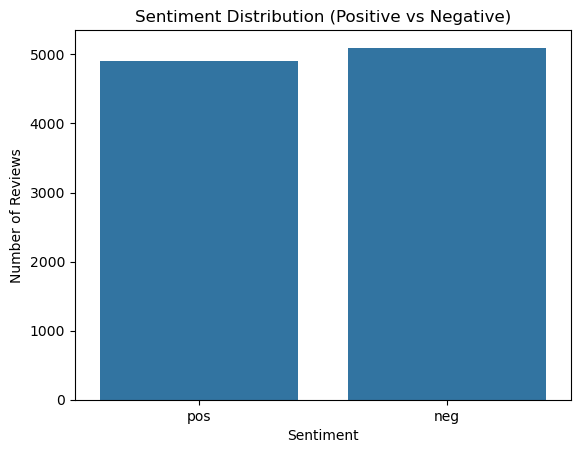

In [9]:
# Visualize how many positive and negative reviews are present
sns.countplot(x='label', data=data)
plt.title("Sentiment Distribution (Positive vs Negative)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [10]:
# Separate Positive and Negative Reviews
positive_reviews = data[data['label'] == 'pos']['clean_review']
negative_reviews = data[data['label'] == 'neg']['clean_review']

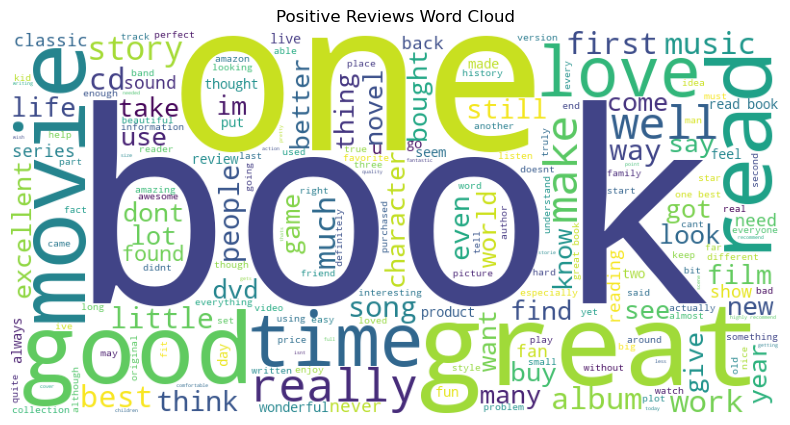

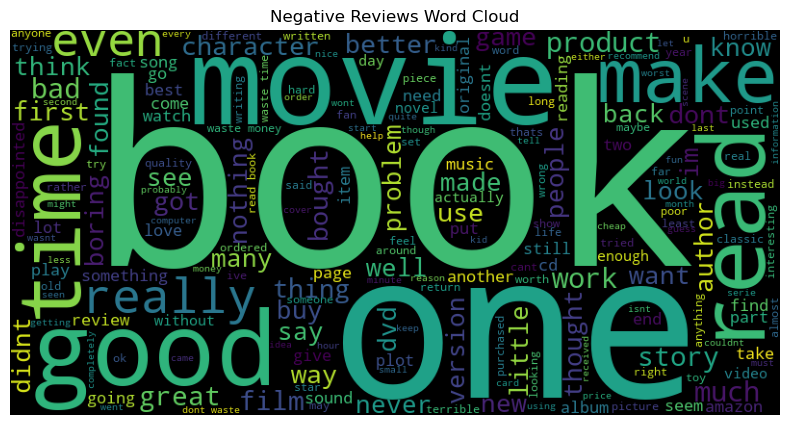

In [11]:
# Word Cloud for Positive Reviews
pos_text = " ".join(positive_reviews)
wordcloud_pos = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(pos_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()


# Word Cloud for Negative Reviews
neg_text = " ".join(negative_reviews)
wordcloud_neg = WordCloud(
    width=800,
    height=400,
    background_color='black'
).generate(neg_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()

In [12]:
# Word Frequency Analysis

# Overall most common words in all reviews
all_words = " ".join(data['clean_review']).split()
common_words = Counter(all_words).most_common(10)
print("Overall Most 10 Common Words:\n", common_words)

# Top 10 most frequent words in positive reviews
pos_words = " ".join(positive_reviews).split()
top_pos_words = Counter(pos_words).most_common(10)
print("\nTop 10 Positive Words:\n", top_pos_words)

# Top 10 most frequent words in negative reviews
neg_words = " ".join(negative_reviews).split()
top_neg_words = Counter(neg_words).most_common(10)
print("\nTop 10 Negative Words:\n", top_neg_words)

Overall Most 10 Common Words:
 [('book', 6497), ('one', 3857), ('like', 2815), ('good', 2769), ('read', 2740), ('great', 2719), ('movie', 2550), ('would', 2381), ('get', 1932), ('time', 1905)]

Top 10 Positive Words:
 [('book', 3313), ('great', 2087), ('one', 1835), ('good', 1635), ('read', 1553), ('like', 1268), ('movie', 1085), ('would', 943), ('love', 902), ('time', 871)]

Top 10 Negative Words:
 [('book', 3184), ('one', 2022), ('like', 1547), ('movie', 1465), ('would', 1438), ('dont', 1240), ('read', 1187), ('get', 1139), ('good', 1134), ('time', 1034)]


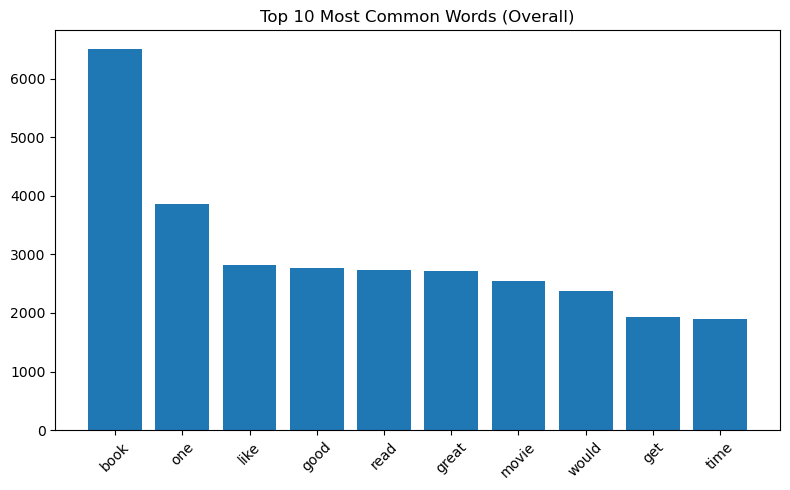

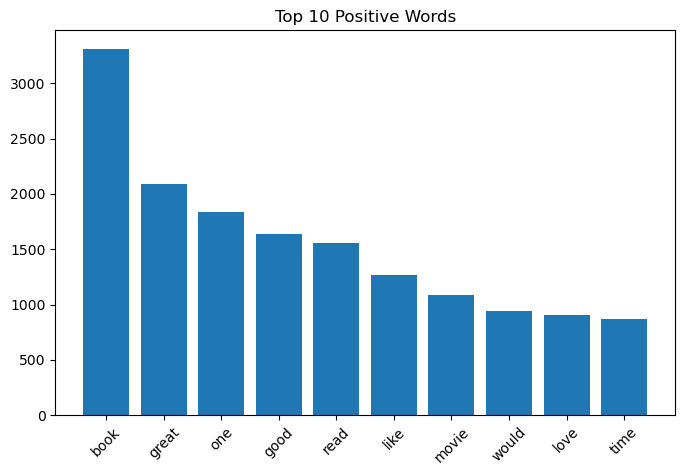

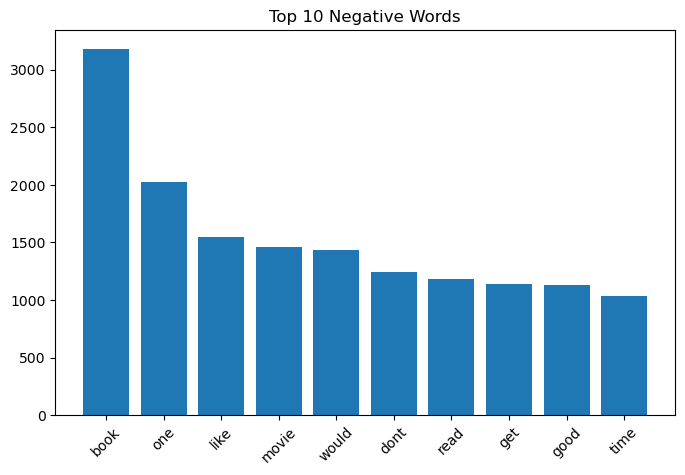

In [13]:
# Bar Plots
# Bar Plot: Top 10 Most Common Words (Overall)
words, counts = zip(*common_words)
plt.figure(figsize=(8,5))
plt.bar(words, counts)
plt.title("Top 10 Most Common Words (Overall)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar Plot: Top 10 Positive Words
pos_words, pos_counts = zip(*top_pos_words)
plt.figure(figsize=(8,5))
plt.bar(pos_words, pos_counts)
plt.title("Top 10 Positive Words")
plt.xticks(rotation=45)
plt.show()

# Bar Plot: Top 10 Negative Words
neg_words, neg_counts = zip(*top_neg_words)
plt.figure(figsize=(8,5))
plt.bar(neg_words, neg_counts)
plt.title("Top 10 Negative Words")
plt.xticks(rotation=45)
plt.show()


In [14]:
# Model Developments
"""
TF-IDF is a feature extraction technique that measures 
how important a word is in a document relative to the entire dataset.
It gives higher weight to informative words and lower weight to commonly occurring words.

"""

'\nTF-IDF is a feature extraction technique that measures \nhow important a word is in a document relative to the entire dataset.\nIt gives higher weight to informative words and lower weight to commonly occurring words.\n\n'

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(data['clean_review'])
y = data['label']

# Train–Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42 , stratify=y)


In [16]:
# Model-1 : Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

lr_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", lr_acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8525

Classification Report:
               precision    recall  f1-score   support

         neg       0.85      0.86      0.86      1019
         pos       0.85      0.85      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [17]:
# Model-2: SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

svm_model = LinearSVC()
svm_model.fit(x_train, y_train)

svm_pred = svm_model.predict(x_test)

svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:",svm_acc )
print("\nSVM Classification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy: 0.843

SVM Classification Report:
               precision    recall  f1-score   support

         neg       0.85      0.84      0.84      1019
         pos       0.83      0.85      0.84       981

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



In [18]:
# Model-3: Neural Network

#pos → 1, neg → 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_nn = le.fit_transform(y_train)
y_test_nn = le.transform(y_test)

#Build Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
nn_model = Sequential()
nn_model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],))) # Input layer + first hidden layer
nn_model.add(Dense(64, activation='relu')) # Second hidden layer
nn_model.add(Dense(1, activation='sigmoid')) # Output layer

# Compile model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Train the Neural Network
history = nn_model.fit(
    x_train.toarray(), y_train_nn,
    validation_split=0.2,
    epochs=7,
    batch_size=32,
    verbose=1
)

# Evaluate Neural Network
nn_loss, nn_acc = nn_model.evaluate(x_test.toarray(), y_test_nn)
print("\n Neural Network Accuracy:", nn_acc)
nn_pred = (nn_model.predict(x_test.toarray()) > 0.5).astype("int32")
print(classification_report(y_test_nn, nn_pred))

Epoch 1/7


/opt/anaconda3/envs/anaconda-2025.04-py3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8036 - loss: 0.4491 - val_accuracy: 0.8363 - val_loss: 0.3739
Epoch 2/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9342 - loss: 0.1789 - val_accuracy: 0.8275 - val_loss: 0.4289
Epoch 3/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0755 - val_accuracy: 0.8263 - val_loss: 0.5677
Epoch 4/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9944 - loss: 0.0277 - val_accuracy: 0.8206 - val_loss: 0.6981
Epoch 5/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - loss: 0.0085 - val_accuracy: 0.8294 - val_loss: 0.8133
Epoch 6/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.8269 - val_loss: 0.9091
Epoch 7/7
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.6117e-04 - val_accuracy: 0.8256 - val_loss: 0.9865
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.8210 - loss: 0.9689

 Neural Network Accuracy: 0.8209999799728

In [19]:
# 3 models accuracies
accuracies = pd.DataFrame({"Model": [ "1-Logistic Regression", "2-Support Vector Machine", "3-Neural Network"],
    "Accuracy": [lr_acc, svm_acc, nn_acc]})
accuracies

,Model,Accuracy
0,1-Logistic Regression,0.8525
1,2-Support Vector Machine,0.8430
2,3-Neural Network,0.8210


In [ ]:
# Different models were tested.
# Logistic Regression performed the best among them.